In [ ]:
'''
    - NLTK -- for tokenezing russian texts of election programs
    
    - (LINK!!) -- for creating matrix of program_x_term
    - sklearn -- for clustering...
'''

In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# 0. Pre-defining functions

In [2]:
# to find n-th occurance of substring in the string (n = 0,1...)

def find_substring(txt, str1, n):
    parts = txt.split(str1, n + 1)
    if len(parts) <= n + 1:
        return -1
    return len(txt) - len(parts[-1]) - len(str1)

# 1. Loading data - election programs and flags of candidates

In [182]:
# downloading all election programs

programs_df = pd.read_csv('../library: main/ssmm_elections_candidates_1_11.csv', sep='\t', encoding='utf-8')
programs_df = programs_df[['conv_x_name','name','program_txt','convocation_no']][programs_df['program_txt'].notna()].reset_index().drop(['index'],axis=1)
programs_df.head()


,conv_x_name,name,program_txt,convocation_no
0,1_Левин_Андрей,Левин Андрей,"Активный участник и организатор различных мероприятий (воспоминания о любимой школе), готов работать, творить, уверен, что все получится.)",1
1,1_Кириллова_Полина,Кириллова Полина,"Мне нравится заниматься общественной деятельностью, всячески пытаюсь расширять свой кругозор. Еще в школе организовывала различные мероприятия и была сильно этим заинтересована. Увлекаюсь музыкой, для большего развития записалась в Академический хор. Начала заниматься спортивными бальными танцами. Но в спорте симпатизирую футболу. Планирую посетить еще некоторые клубы Университета и найти, что также может меня затянуть. Хотелось бы внести свой клад в развитие Университета. План работы: 1.Всестороннее развитие студентов. Нас кругом окружает бескультурье и невежество, общество просто гниет. Многие не могут отстаивать свои права, а причина в том, что они просто их не знают. И нужно что-то с этим делать. Поэтому хочется поднять вопрос о всестороннем развитии студентов. Если мы, допустим, обучаемся на Мехмате, это не означает, что мы должны всё своё время отдавать математике и только ей. (В расписании 1 курса в этом учебном году стояли только одни математические дисциплины и физкультура, во втором семестре появились английский язык и БЖД,. Это уже хорошо, но нам убрали историю, это что не такой важный предмет, мы не должны знать истории своей страны?А потом говорят, что нынешнее поколение необразованное.) Почему бы не ввести дополнительный предмет, но при условии, что студент сможет сам для себя выбрать, что ему интересно? Или дополнительные курсы для желающих, возможно, конечно, что такие курсы проводятся, но тогда встает другой вопрос, почему многие студенты не информированы об этом, ведь просто повесить объявление – это мало. Так же можно приглашать государственных деятелей, людей творческих профессий и т. д. Чтобы они делились своим опытом, общались со студентами, отвечали на их вопросы. 2. Мероприятия внутри потоков. Считаю важным поддерживать дружескую атмосферу внутри потоков. Это небольшие ячейки всего университета, поэтому нужно начать с них, нужно делать их крепче и сплоченней. Предлагаю проводить состязательные мероприятия между группами, игры, что ускорит процесс сближения студентов, как в самих группах, так и внутри потоков. 3.Предоставление большей информации о внеучебной деятельности и о клубах МГУ. 4.Общежития. Улучшение санитарных условий. Обустройство общежитий. Нормальный тренажерный зал и душ. Создание клуба в общежитии для организации праздников.",1
2,1_Семенов_Павел,Семенов Павел,"""Здравствуйте. Я так понимаю, что я уже поздно отправляю вам свой небольшой рассказ, но возможности сделать это ранее просто не представлялось. Итак, есть несколько пунктов, которые необходимо постоянно поддерживать и развивать. Большинство из них известно всем студентам, на них останавливаться я не буду, так как методы решения проблем там идентичны. Общежитие. К сожалению, сам я не очень хорошо знаю всех плюсов и минусов нынешнего общежития для ММ. Но по рассказам однокурсников, проблемы возникают, в первую очередь, с насекомыми. На кухне шастают тараканы, в комнатах клопы, от которых утром просыпаешься весь в укусах, а порой и вообще невозможно уснуть. Эти вопросы несомненно нужно решать общими усилиями СтудСовета и самого общежития. Студенческая жизнь. Очень слабый поток информации доходит до студентов ММ о каких-либо развлекательных и культурных мероприятиях. В первую очередь, необходимо увеличить потом этой информации, а так же дать студентам факультета больше свободы для организации подобных праздников. Пожалуй это основные два пункта, на которых я хотел остановиться. Буду рад вступить в СтудСовет, помогать и развивать Мех-Мат изнутри. Всем удачи. ;)""",1
3,1_Кузнецова_Алёна,Кузнецова Алёна,"""Меня очень интересует жизнь Университета. я была активным участником жизни класса и гимназии, участвовала в различных городских мероприятиях, играла в школьном театре и была постановщи

In [52]:
# downloading info about first nomination/membership of person

core_df = pd.read_csv('../library: main/ssmm_candidates_core.csv', sep='\t', encoding='utf-8')
# print(list(core_df))
core_df = core_df[['name','min_member_conv_no','min_cand_conv_no','cand_conv_cnt','manage_convocation_cnt']].reset_index().drop(['index'],axis=1)
core_df = core_df.fillna(0)
core_df.head()


,name,min_member_conv_no,min_cand_conv_no,cand_conv_cnt,manage_convocation_cnt
0,Владыкина Вероника Евгеньевна,1.0,1,3,2.0
1,Коновалов Антон Александрович,1.0,1,2,1.0
2,Ласкин Алексей Александрович,1.0,1,3,0.0
3,Малхасян Арамаис,1.0,1,1,0.0
4,Попов Леонид Андреевич,1.0,1,3,2.0


In [53]:
# downloanding info about person's cluster (after clustering of person)

person_clusters_df = pd.read_csv('person_clusters.csv', sep='\t', encoding='utf-8')
person_clusters_df = person_clusters_df[['key','cluster']].rename(columns={'key':'name'})
person_clusters_df.head()

,name,cluster
0,Владыкина Вероника Евгеньевна,4
1,Коновалов Антон Александрович,1
2,Ласкин Алексей Александрович,1
3,Малхасян Арамаис,2
4,Попов Леонид Андреевич,4


In [183]:
programs_df_2 = programs_df.merge(core_df, on='name', how='left')
# print(list(programs_df_2))

# new flag (I'm interested in: True / False)
programs_df_2['first_nomination_flg'] = programs_df_2['convocation_no'] == programs_df_2['min_cand_conv_no']
# new flag (I'm interested in: False)
programs_df_2['first_membership_flg'] = programs_df_2['convocation_no'] == programs_df_2['min_member_conv_no']

programs_df_2 = programs_df_2.merge(person_clusters_df, on='name', how='left')
programs_df_2.head(1)

,conv_x_name,name,program_txt,convocation_no,min_member_conv_no,min_cand_conv_no,cand_conv_cnt,manage_convocation_cnt,first_nomination_flg,first_membership_flg,cluster
0,1_Левин_Андрей,Левин Андрей,"Активный участник и организатор различных мероприятий (воспоминания о любимой школе), готов работать, творить, уверен, что все получится.)",1,1.0,1,1,0.0,True,True,2


In [55]:
len(programs_df_2)

481

In [8]:
pd.set_option('display.max_colwidth', None)

In [12]:
# downloading info about candidates with election programs

# programs_df = pd.read_csv('../library: main/ssmm_elections_candidates_1_11.csv', sep='\t', encoding='utf-8')
# programs_df = programs_df[['conv_x_name','program_txt','convocation_no']][programs_df['program_txt'].notna()].reset_index().drop(['index'],axis=1)

# programs_df.head()


In [13]:
# len(programs_df)

In [359]:
# all nominations
# programs_df_3 = programs_df_2[list(programs_df_2)] # bad clustering

# only persons from clusters 1,2,4
programs_df_3 = programs_df_2[programs_df_2['cluster'].isin([1,2,4])] # bad clustering

# programs_df_3 = programs_df_2[programs_df_2['cluster'] == 4] # bad clustering
# programs_df_3 = programs_df_2[programs_df_2['cand_conv_cnt'] >= 3] # worse clustering
# programs_df_3 = programs_df_2[programs_df_2['cand_conv_cnt'] >= 4] # bad clustering
# programs_df_3 = programs_df_2[programs_df_2['convocation_no'].isin([4,5,6])] # bad clustering

# 2+ ordinal number of nomination
# programs_df_3 = programs_df_2[programs_df_2['first_nomination_flg'] == False] 

# limit = 91 # for convocations 1-3
limit = len(programs_df_3)

programs_df_3['short_key'] = programs_df_3['conv_x_name'].apply(lambda x: x[:find_substring(x, '_', 1)+2])
key_list = list(programs_df_3['short_key'])[:limit]
# key_list[-5:]
program_list = list(programs_df_3['program_txt'])[:limit]

# number of processing programs 
len(program_list)

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_22491/3089012103.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  programs_df_3['short_key'] = programs_df_3['conv_x_name'].apply(lambda x: x[:find_substring(x, '_', 1)+2])


379

['11_Терехов_М',
 '11_Поликарпов_А',
 '11_Каляев_Т',
 '11_Маммагаджиев_Р',
 '11_Третьякова_Е']

# 2. Tokenizing of texts

In [185]:
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
# for russian text

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
# stopwords

# Stemming is just the process of breaking a word down into its root.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:

# def remove_noise(text, stop_words = []):
#     tokens = word_tokenize(text, language="russian")
#     cleaned_tokens = []
#     for token in tokens:
#         token = re.sub('[^А-Яа-я]+', '', token)
#         if len(token) > 1 and token.lower() not in stop_words:
#             # Get lowercase
#             cleaned_tokens.append(token.lower())
#     return cleaned_tokens

# [^A-Za-z0-9]+

# remove_noise("Мне нравится заниматься общественной деятельностью.")

In [ ]:
# http://brandonrose.org/clustering#Stopwords,-stemming,-and-tokenizing

In [83]:
# to add stopwords

# stopwords += [
#         'это', 'этим', 
#         'моего',
#         'свой', 'свои', 'своего', 'своей', 
#         'всем', 'всё',
#         'нашего', 
#         'таких', 'также', 
#         'поэтому', 'многие', 'очень', 'других', 
#         'который', 'которая', 'которое', 'которого', 'которую', 'которым', 'которой', 'которых'
#     ] + [
#         'являюсь', 
#         'хотел', 'хотела', 'хочу', 'хотелось',
#         'могу',
#         'рассказ', 'школе', 
#         'году', 'год', 'года',
#         'зовут', 'привет', 'различных', 'надеюсь', 'считаю', 'просто', 'вообще'
#     ] + [
#         'мгу', 'университет', 'университета',
# #         'мехмата', 'мехмат', 'мехмате', 'факультета', 'факультете', 'факультет',
#         'студсовета', 'студсовете', 'студсовет', 'совет', 'совета', 'совете',
#         'студентов', 'студенты', 'студентам', 'студенческий', 'студенческого', 'студенческом',
#         '2012',
#         'организации', 'организацией', 'организация'
#       ]


In [40]:
# sents = nltk.sent_tokenize('Мне нравится заниматься общественной деятельностью, всячески пытаюсь расширять свой кругозор. Еще в школе организовывала различные мероприятия и была сильно этим заинтересована', language="russian")
# print(sents)

# for sent in sents:
#     for word in nltk.word_tokenize(sent, language="russian"):
#         print(word)


In [20]:
#

def tokenize_and_stem(text, stopwords=stopwords, lang="russian"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text, stopwords, lang):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [43]:
# for program in program_list:
#     print(tokenize_and_stem(program, stopwords, "russian"))

In [236]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in program_list:
    allwords_stemmed = tokenize_and_stem(i, stopwords, "russian")
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i, stopwords, "russian")
    totalvocab_tokenized.extend(allwords_tokenized)
    
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print(vocab_frame.shape[0])

20187


# Tf-idf and program similarity

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [342]:
# alternative way, with own list of stop words
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

tfidf_vectorizer = TfidfVectorizer(
#     max_features=200, 
    max_df=0.7, min_df=0.013, 
    ngram_range=(2,2), # only 2-grams
    tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(program_list)
# idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
terms = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.shape)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(379, 145)


In [343]:
# most frequent 2-grams
terms

array(['активн занима', 'активн участ', 'активн участвова',
       'активн участник', 'больш част', 'буд стара', 'бытов вопрос',
       'ваш поддержк', 'вещ котор', 'вмест сдела', 'внест вклад',
       'возможн помоч', 'вопрос котор', 'встреч второкурсник',
       'втор раз.', 'вуз стран', 'главн здан', 'групп бытов',
       'групп занима', 'групп образован', 'групп оповещен',
       'групп первокурсник', 'групп помога', 'групп праздник',
       'дан момент', 'дела жизн', 'ден ден', 'ден пифагор', 'дня пифагор',
       'добр ден', 'жизн интересн', 'жизн мехматя',
       'заместител председател', 'занима вопрос', 'занима обществен',
       'занима праздник', 'занима спортивн', 'защища интерес',
       'избира вперв', 'избира втор', 'измен лучш', 'инициативн групп',
       'иностра язык', 'интерес поток', 'интересн мероприят', 'кажд ден',
       'кажд студент', 'качеств образован', 'конкурс групп',
       'координатор рабоч', 'котор будут', 'культурно-массов мероприят',
       'куратор г

In [344]:
# deleting noisy 2-grams from terms
drop_n_grams = [
#     greetings and requests
    'буд рад', 'ваш поддержк', 'добр ден', 'добр времен', 'времен суток', 'пода заявк', 'спасиб вниман', 'стат член', 'ваш голос', 
    
#     about theirself
    'избира вперв', 'избира втор', 'избира трет', 'избира четверт', 'предыдущ созыв', 'прошл созыв', 'нов созыв', 'мо программ', 
    'перв курс', 'студент курс', 'старост групп', 'ваш интерес', 'поток курс', 
    
#     common phrases
    'вмест сдела', 'внест вклад', 'возможн помоч', 'продолж работ', 'занима вопрос', 'продолж занима', 'сдела жизн', 'дела жизн', 
    'созыв планир', 'планир заня', 
    'планир занима', 'планир продолж', 'активн занима', 'активн участ', 'активн участвова', 'активн участник', 
    'помога студсовет', 'постара сдела', 'принима активн', 'принима участ', 'приня участ', 'участ жизн', 
    'обществен деятельн', 'обществен жизн', 'занима обществен', 'наш жизн', 'студенческ жизн', 'жизн мехматя', 'сдела наш', 
    'лучш вуз', 'вуз стран', 'нов ид', 
    'план работ', 'работ групп', 'рабоч групп', 'нов проект', 'студенческ совет', 'групп занима', 
    
#     other
    'вопрос котор', 'котор будут', 'огромн количеств', 'дан момент', 'ближайш врем', 'ден ден', 'мероприят котор', 'проект котор', 
    'котор будут', 'бур эмоц', 'учебн част', 'кажд ден', 'кажд студент', 'младш курс', 'связ студент', 'вещ котор', 'втор раз.', 
    'люд котор', 'мног друг', 'что-т нов', 'что-т полезн', 
]

search = np.array(drop_n_grams)
search_indexes = np.searchsorted(terms, search)
terms = np.delete(terms, search_indexes)
terms
# terms_fix

array(['главн здан', 'групп бытов', 'групп образован', 'групп оповещен',
       'групп первокурсник', 'групп помога', 'групп праздник',
       'ден пифагор', 'дня пифагор', 'жизн интересн',
       'заместител председател', 'занима праздник', 'занима спортивн',
       'защища интерес', 'инициативн групп', 'иностра язык',
       'интерес поток', 'интересн мероприят', 'качеств образован',
       'конкурс групп', 'координатор рабоч', 'культурно-массов мероприят',
       'куратор групп', 'мероприят ден', 'мероприят организовыва',
       'направлен работ', 'образован бытов', 'общежит гз',
       'одн организатор', 'организовыва праздник', 'организовыва различн',
       'ответствен секретар', 'открыт переход', 'переход а13-б19',
       'пифагор ден', 'повышен стипенд', 'помога мероприят',
       'помога организовыва', 'помога праздник', 'помога проведен',
       'праздник ден', 'праздник мероприят', 'праздник спорт',
       'представля интерес', 'приемн комисс', 'проблем котор',
       'прове

In [345]:
# deleting appropriate columns from tfidf_matrix

from scipy import sparse

indexes_to_keep = list(set(range(tfidf_matrix.shape[1]))-set(search_indexes))
tfidf_matrix = sparse.lil_matrix(sparse.csr_matrix(tfidf_matrix)[:, indexes_to_keep]) # tfidf_matrix_new

# to see the result
# tfidf_array_new = tfidf_matrix.todense()
# tfidf_df = pd.DataFrame(tfidf_array_new)
# tfidf_df
# tfidf_df_new

In [ ]:
'''
TO MANY PHRASES WITH SIMILAR MEANING WHICH CAN DISTRIBUTED IN OTHER CLUSTERS
I WANT TO UNITE THEM

!!!!

IDEA: to cluster 2-grams the same way)))
'''

In [328]:
terms_df = pd.DataFrame(terms).rename(columns={0: '2_gram'})
terms_df

,2_gram
0,главн здан
1,групп бытов
2,групп образован
3,групп оповещен
4,групп первокурсник
...,...
66,участвова мероприят
67,участвова проведен
68,участвова распределен
69,учебн процесс


In [357]:
key_terms_list = list(terms_df['2_gram'])
terms_list = list(terms_df['2_gram'])

In [367]:
tfidf_vectorizer_terms = TfidfVectorizer(
#     max_features=200, 
    max_df=0.7, min_df=0.03, 
    ngram_range=(1,1), # only 1-grams
    tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix_terms = tfidf_vectorizer_terms.fit_transform(terms_list)
# idf_values = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
terms_terms = tfidf_vectorizer_terms.get_feature_names_out()

print(tfidf_matrix_terms.shape)

(71, 15)


/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


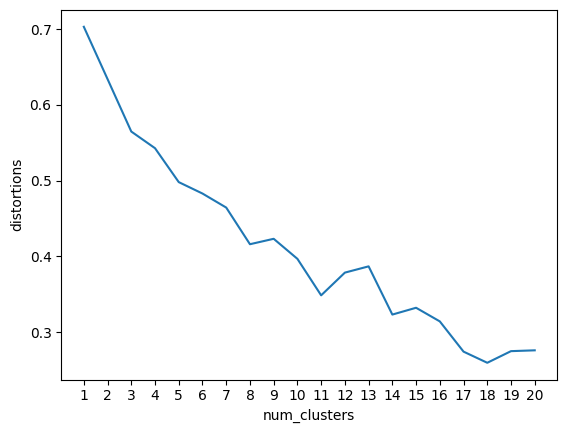

In [371]:
distortions_terms = []
num_clusters_range = range(1, 21)

# Create a list of distortions from the kmeans method
for i in num_clusters_range:
    cluster_centers_terms, distortion_terms = kmeans(tfidf_matrix_terms.todense(), i)
    distortions_terms.append(distortion_terms) 
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                           'distortions': distortions_terms})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters_range)
plt.show()

In [372]:
num_clusters_terms = 8

km_terms, frame_terms = create_clusters(tfidf_matrix_terms, num_clusters_terms, key_terms_list, terms_list)
print_clusters(km_terms, frame_terms, terms_terms, num_clusters_terms)


CPU times: user 99.1 ms, sys: 83.6 ms, total: 183 ms
Wall time: 45.5 ms
1    32
3     9
2     8
6     7
4     5
0     4
7     3
5     3
Name: cluster, dtype: int64
Top terms per cluster:

Cluster 0 words:
распредел - 0.921
участвов - 0.182

Cluster 0 keys:
		распределен повышен,		распределен стипенд,		систем распределен,		участвова распределен,

Cluster 1 words:
пробл - 0.075
реш - 0.066
организовыв - 0.054
образова - 0.053
быт - 0.044
помог - 0.022

Cluster 1 keys:
		главн здан,		жизн интересн,		заместител председател,		занима спортивн,		иностра язык,		качеств образован,		координатор рабоч,		направлен работ,		образован бытов,		общежит гз,		одн организатор,		организовыва различн,		ответствен секретар,		открыт переход,		переход а13-б19,		повышен стипенд,		помога организовыва,		приемн комисс,		проблем котор,		продолж деятельн,		работ партнер,		реша проблем,		решен бытов,		решен пробл,		сбор макулатур,		студенческ организац,		туалетн бумаг,		улучшен жизн,		улучшен услов,		услов проживан,	

1

In [322]:
# to find 2-grams with given word

foo = 'мероприят'

arr = np.array([np.char.find(t, foo) for t in terms])
# np.place(arr, arr > -1, True)
# np.place(arr, arr == -1, False)
# # arr

# indexes = np.where(arr == 1)
indexes = np.where(arr != -1)

indexes

(array([ 7, 12, 30, 33, 34]),)

# Create an elbow plot

In [192]:
from scipy.cluster.vq import kmeans #, vq

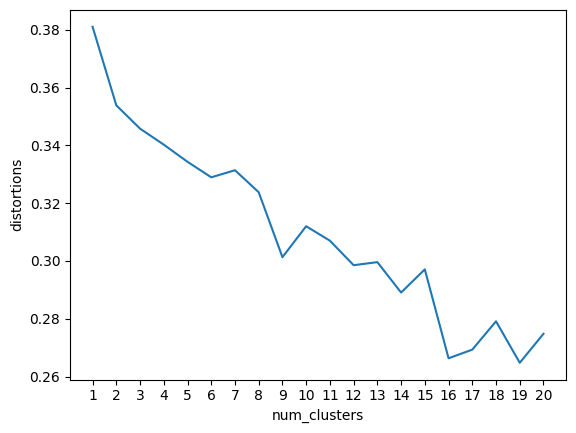

In [297]:
distortions = []
num_clusters_range = range(1, 21)

# Create a list of distortions from the kmeans method
for i in num_clusters_range:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
    distortions.append(distortion) 
    
# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                           'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters_range)
plt.show()

In [ ]:
# VERY LOW DISTORTION!!!! 
# for
# only persons from clusters 1,2,4


# K-Means clusters

In [209]:
from sklearn.cluster import KMeans

In [355]:
def create_clusters(tfidf_matrix, num_clusters, key_list, content_list):

    km = KMeans(n_clusters=num_clusters, n_init=10)
    %time km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    
    program_clusters = {
        'key': key_list, 
        'content': content_list, 
        'cluster': clusters
    }
    frame = pd.DataFrame(program_clusters, index = [clusters], columns = ['key', 'content', 'cluster'])
    print(frame['cluster'].value_counts())
    
    return km, frame

In [368]:
def print_clusters(km, frame, terms, num_clusters):
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    print("Top terms per cluster:")
    print()
    
    for i in range(num_clusters):
        print("Cluster %d words:" % i) # , end=''

        for ind in order_centroids[i, :10]: #replace 10 with n words per cluster
            if km.cluster_centers_[i][ind] > 0:
                print("{0} - {1:.3f}".format(terms[ind], km.cluster_centers_[i][ind]))
        print()

        print("Cluster %d keys:" % i) # , end=''
        for key in frame.loc[i]['key'].values.tolist():
            print('\t\t%s,' % key, end='') # JUST FOR conv_x_name !!!
        print()
        print()

    return 1

In [369]:
num_clusters = 9

km, frame = create_clusters(tfidf_matrix, num_clusters, key_list, program_list)
print_clusters(km, frame, terms, num_clusters)


CPU times: user 141 ms, sys: 114 ms, total: 256 ms
Wall time: 59.6 ms
0    287
8     30
3     15
7     13
6     10
4      9
2      8
5      4
1      3
Name: cluster, dtype: int64
Top terms per cluster:

Cluster 0 words:
интересн мероприят - 0.020
качеств образован - 0.020
групп помога - 0.014
участвова мероприят - 0.014
проведен мероприят - 0.014
пифагор ден - 0.014
инициативн групп - 0.013
занима праздник - 0.013
проблем котор - 0.012
сбор макулатур - 0.011

Cluster 0 keys:
		1_Левин_А,		1_Кириллова_П,		1_Кузнецова_А,		1_Сафина_Д,		1_Глухова_А,		1_Владыкина_В,		1_Сапунов_К,		1_Артамонова_М,		1_Чернодед_А,		1_Штейников_Ю,		1_Савушкин_Н,		2_Габидов_А,		2_Дяченко_М,		2_Ватутин_К,		2_Багров_К,		2_Быстрицкая_В,		2_Сафина_Д,		2_Осин_Р,		2_Смелов_В,		2_Оджаев_Р,		2_Тен_А,		2_Акушевич_А,		2_Дьяков_П,		2_Сапунов_К,		2_Абдуллаева_Э,		3_Бурнус_А,		3_Денисов_И,		3_Ариас-Альварес_В,		3_Григорьев_И,		3_Дорман_Е,		3_Локтионов_Ф,		3_Глунчадзе_И,		3_Ватутин_К,		3_Матвеев_Д,		3_Бунеев_А,		3_Борисов_В,	

1

# ======== DRAFTS:
# ======== DRAFTS:
# ======== DRAFTS:

## Analysis of most frequent tokens

In [42]:
# first index (row) = serial number of program
# second index (column) = serial number of feature (1-token)

# print(tfidf_matrix)

In [85]:
tfidf_array = tfidf_matrix.todense()
tfidf_df = pd.DataFrame(tfidf_array)
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.649005,0.0,0.433823,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.449875,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.269096,0.225922,...,0.170960,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.251177,0.0
3,0.310085,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.281636,0.0,0.377678,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.320848,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.444809,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.000000,0.0,0.0,0.399021,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.351444,0.000000,0.0,0.000000,0.0,0.0,0.0,0.553184,0.000000,0.0
161,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
162,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
163,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [118]:
# tfidf_df[search_indexes]

In [165]:
# flags of occurance 
tfidf_flags_df = tfidf_df[list(tfidf_df)]
for col in list(tfidf_df):
    tfidf_flags_df[col] = np.sign(tfidf_flags_df[col])
# tfidf_flags_df

# frequency of features
feature_frequency = pd.DataFrame(np.sum(tfidf_flags_df)).rename(columns={0:'count'})
# feature_frequency

# russian words of features
terms_df = pd.DataFrame(terms).rename(columns={0:'token'})
# terms_df

# Top-20 of most frequent tokens
tfidf_feature_df = pd.concat([feature_frequency, terms_df], axis=1).sort_values(by='count', ascending=False)
tfidf_feature_df.head(20)

,count,token
30,43.0,повышен стипенд
9,32.0,ден пифагор
0,27.0,активн участ
25,22.0,обществен деятельн
4,22.0,групп образован
7,19.0,групп праздник
5,17.0,групп оповещен
19,16.0,конкурс групп
14,16.0,занима обществен
20,15.0,координатор рабоч


In [226]:
# exceptions = ['групп','вопрос','участ','нов','врем','созыв','перв','студент','поток','студенческ','член','наш','ваш','ид','втор']

# tfidf_feature_df[~tfidf_feature_df['token'].isin(exceptions)].head(30)

In [32]:
# tfidf_matrix.todense()

In [53]:
# terms

In [ ]:
# GOOD ENOUGH: 
# 1-3 conv [:91] 
# max_features=100
# max_df=0.2, min_df=0.05
# num_clusters = 3


In [175]:
# km.cluster_centers_

In [176]:
# km.cluster_centers_.argsort()

# (Alt: Clustering with sparse matrix)

In [224]:
from scipy.cluster.vq import kmeans, vq

In [225]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:10])

['конкурс групп', 'обществен деятельн', 'бытов вопрос', 'планир занима', 'вопрос котор', 'активн участ', 'дня пифагор', 'жизн мехматя', 'занима вопрос', 'инициативн групп']
['инициативн групп', 'внест вклад', 'иностра язык', 'планир продолж', 'координатор рабоч', 'обществен жизн', 'активн участ', 'дела жизн', 'занима вопрос', 'общежит гз']
['обществен работ', 'активн участ', 'добр ден', 'общежит гз', 'групп оповещен', 'интерес поток', 'нов созыв', 'иностра язык', 'дела жизн', 'групп образован']
['ответствен секретар', 'активн участ', 'интересн мероприят', 'перв курс', 'активн участник', 'нов проект', 'интерес поток', 'групп первокурсник', 'мероприят ден', 'наш жизн']
['групп оповещен', 'встреч второкурсник', 'жизн интересн', 'занима обществен', 'качеств образован', 'групп образован', 'лучш вуз', 'повышен стипенд', 'куратор групп', 'жизн мехматя']


In [ ]:
# CONCLUSION: clustering is failed
# (maybe because of noisy words)

In [356]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
# print
# print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [357]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [366]:
# cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

# cluster_names = {0: 'Family, home, war', 
#                  1: 'Police, killed, murders', 
#                  2: 'Father, New York, brothers', 
#                  3: 'Dance, singing, love', 
#                  4: 'Killed, soldiers, captain'}

cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = str(i)

In [445]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=key_list)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], # color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

ValueError: All arrays must be of the same length

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

In [ ]:
# N-grams !!!!

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

# ideas from datacamp

In [ ]:
# NAIVE BAYES -- the best classifier for texts

# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Training and testing the "fake news" model with CountVectorizer

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


In [ ]:
# Training and testing the "fake news" model with TfidfVectorizer

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


In [ ]:
# basic features:
#     - number of words
#     - number of charachters
#     - average length of words

#     - number of sentences
#     - number of paragraphs
#     - number of words starting with capitals


# text features
# word features

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

In [ ]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

In [ ]:
# lemmatization = convert words into its base form

# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

In [ ]:
# part-of-speech (POS) tagging


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

In [ ]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

In [ ]:
# n-grams

In [ ]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

In [ ]:
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

In [ ]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

In [ ]:
'''
(?)
    - to predict by program length, in what time the candidate nominates
    - to classify programs by quantitative features 
'''

In [ ]:
'''
QUESTIONS:
    - is clustering working on stemmed_words, not on original?
    - how to cut the top of noisy words?

IDEAS:
    - to cluster programs for 1st nomination and for 2+ nominations (+, but no sense)
    - to cluster programs for clusters of persons !!!
    - to add 2-tokens
    
    - to cluster programs only for 3+ time nominated persons
    - to unite text of each person with 2+ time nominated persons?
    
    - TO ADD VISUALIZATION (scatterplot) !!!!!
'''